In [1]:
from scipy.stats import linregress
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_excel("project_1_data.xls")

In [3]:
df.dtypes

Time             float64
Concentration    float64
dtype: object

In [4]:
df

,Time,Concentration
0,0.00,0.0
1,1.08,84.9
2,1.78,239.0
3,2.30,233.0
4,2.75,220.0
5,3.30,236.4
6,3.82,245.1
7,4.32,230.0
8,4.80,227.8
9,5.28,261.9


In [5]:
x = df.Time.values[-3:]
y = df.Concentration.values[-3:]
slope, intercept, r_value, p_value, std_err = linregress(x, y)

In [6]:
# line = [slope*xi + intercept for xi in x]
# plt.plot(x, line, color = 'blue', label="Fitting Line", linewidth=1)
# plt.show()

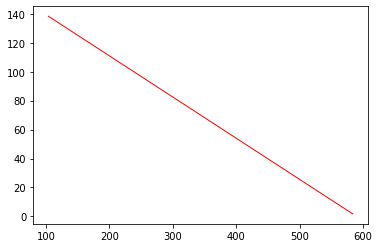

In [7]:
ext_x = np.array([x[-1] + d for d in range(10, 500, 10)])
concentrations = [slope*xi + intercept for xi in ext_x]
plt.plot(ext_x, concentrations, color = 'red', label="Fitting Line", linewidth=1)
plt.show()

In [8]:
df.Time.values

array([ 0.  ,  1.08,  1.78,  2.3 ,  2.75,  3.3 ,  3.82,  4.32,  4.8 ,
        5.28,  5.95,  6.32,  6.98,  9.83, 16.3 , 20.25, 29.67, 39.93,
       58.  , 74.  , 94.  ])

In [9]:
ext_x

array([104., 114., 124., 134., 144., 154., 164., 174., 184., 194., 204.,
       214., 224., 234., 244., 254., 264., 274., 284., 294., 304., 314.,
       324., 334., 344., 354., 364., 374., 384., 394., 404., 414., 424.,
       434., 444., 454., 464., 474., 484., 494., 504., 514., 524., 534.,
       544., 554., 564., 574., 584.])

In [10]:
x1 = np.concatenate((df.Time.values, ext_x))

In [11]:
y1 = np.concatenate((df.Concentration.values, np.array(concentrations)))

In [12]:
np.vstack((x1, y1))

array([[  0.        ,   1.08      ,   1.78      ,   2.3       ,
          2.75      ,   3.3       ,   3.82      ,   4.32      ,
          4.8       ,   5.28      ,   5.95      ,   6.32      ,
          6.98      ,   9.83      ,  16.3       ,  20.25      ,
         29.67      ,  39.93      ,  58.        ,  74.        ,
         94.        , 104.        , 114.        , 124.        ,
        134.        , 144.        , 154.        , 164.        ,
        174.        , 184.        , 194.        , 204.        ,
        214.        , 224.        , 234.        , 244.        ,
        254.        , 264.        , 274.        , 284.        ,
        294.        , 304.        , 314.        , 324.        ,
        334.        , 344.        , 354.        , 364.        ,
        374.        , 384.        , 394.        , 404.        ,
        414.        , 424.        , 434.        , 444.        ,
        454.        , 464.        , 474.        , 484.        ,
        494.        , 504.        , 514.

In [13]:
for i in range(len(ext_x)):
    df = df.append(dict([("Time", ext_x[i]), ("Concentration", concentrations[i])]), ignore_index=True)

In [14]:
df

,Time,Concentration
0,0.00,0.000000
1,1.08,84.900000
2,1.78,239.000000
3,2.30,233.000000
4,2.75,220.000000
...,...,...
65,544.00,13.102869
66,554.00,10.256557
67,564.00,7.410246
68,574.00,4.563934


In [15]:
df.to_excel("project_1_extended_data.xlsx")

In [16]:
from datetime import timedelta

df['Time'] = df['Time'].astype(str) 

def convert_to_time(x):
    split_ar =  x.split('.')
    if len(split_ar) == 1:
        return timedelta(minutes=float(split_ar[0]), seconds=0, milliseconds=0)
    if len(split_ar) == 2:
        return timedelta(minutes=float(split_ar[0]), seconds=float(split_ar[1]), milliseconds=0)
    raise ValueError()

df['Time'] = df['Time'].apply(convert_to_time)
df["Time"] = pd.Timestamp('today').normalize() + df['Time']

In [17]:
df = df.set_index('Time')

<AxesSubplot:title={'center':'Cp(t)'}, xlabel='Time'>

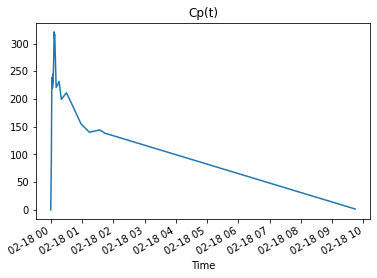

In [18]:
df['Concentration'].plot(title = "Cp(t)")

In [19]:
#df.to_csv("project_1_extended_data.csv", index=False)